# Notebook #5: Predicciones

In [ ]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score
from sklearn.preprocessing import StandardScaler

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../")
from src import soporte_ajuste_logistica as sal

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
df = pd.read_pickle('../datos/pickles_transformados/modelo1/df_estandarizado.pkl')

In [ ]:
df = df.astype(float)

In [42]:
X = df.drop("Attrition", axis = 1)
y = df[["Attrition"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [26]:
parametros_default = {
            "tree": {
                'max_depth': [3, 5, 10],
                'min_samples_split': [2, 10, 15],
                'min_samples_leaf': [1, 4, 8]
            },
            "random_forest": {
                'n_estimators': [50, 100, 200],
                'max_depth': [2, 6, 8, 20, 12, 16],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [4, 6, 8]
            },
            "gradient_boosting": {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 4, 5],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'subsample': [0.8, 1.0]
            },
            "xgboost": {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [5, 7, 9],
                'min_child_weight': [1, 3, 5],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0]
            }}

In [43]:
analisis_mod_clas = sal.AnalisisModelosClasificacion(df, "Attrition")

In [53]:
df_lg = analisis_mod_clas.ajustar_modelo("logistic_regression")
df_lg = analisis_mod_clas.calcular_metricas("logistic_regression")
df_lg["modelo"] = "logistic_regression"
df_lg

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.837639,0.828010,0.837639,0.768590,0.038343,0.746361,0.000955,NaN,NaN,NaN,logistic_regression
test,0.861502,0.860904,0.861502,0.804815,0.077973,0.793659,NaN,NaN,0.000955,NaN,logistic_regression


In [50]:
df_tree = analisis_mod_clas.ajustar_modelo("tree", param_grid=parametros_default["tree"])
df_tree = analisis_mod_clas.calcular_metricas("tree")
df_tree["modelo"] = "tree"
df_tree

Fitting 5 folds for each of 27 candidates, totalling 135 fits
El mejor modelo es DecisionTreeClassifier(max_depth=10, random_state=42)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.956547,0.956457,0.956547,0.954687,0.829673,0.959035,0.001676,8.0,NaN,NaN,tree
test,0.894366,0.888650,0.894366,0.890841,0.544726,0.811006,NaN,NaN,0.001676,8.0,tree


In [17]:
df_rf = analisis_mod_clas.ajustar_modelo("random_forest", param_grid=parametros_default["random_forest"])
df_rf = analisis_mod_clas.calcular_metricas("random_forest")
df_rf["modelo"] = "random_forest"
df_rf

Fitting 5 folds for each of 162 candidates, totalling 810 fits
El mejor modelo es RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=50,
                       n_jobs=-1, random_state=42)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.963006,0.964576,0.963006,0.961077,0.852723,0.999883,0.038608,-1.0,NaN,NaN,random_forest
test,0.902582,0.907663,0.902582,0.882044,0.462072,0.942721,NaN,NaN,0.038608,-1.0,random_forest


In [18]:
df_gb = analisis_mod_clas.ajustar_modelo("gradient_boosting", param_grid=parametros_default["gradient_boosting"])
df_gb = analisis_mod_clas.calcular_metricas("gradient_boosting")
df_gb["modelo"] = "gradient_boost"
df_gb

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
El mejor modelo es GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_leaf=4,
                           n_estimators=200, random_state=42)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.025561,8.0,NaN,NaN,gradient_boost
test,0.969484,0.970134,0.969484,0.968081,0.865574,0.986472,NaN,NaN,0.025561,8.0,gradient_boost


In [56]:
df_xgb = analisis_mod_clas.ajustar_modelo("xgboost", param_grid=parametros_default["xgboost"])
df_xgb = analisis_mod_clas.calcular_metricas("xgboost")
df_xgb["modelo"] = "x_gradient_boost"
df_xgb

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010247,NaN,NaN,NaN,x_gradient_boost
test,0.971831,0.972366,0.971831,0.970657,0.876821,0.984454,NaN,NaN,0.010247,NaN,x_gradient_boost


Nos interesa priorizar el recall, que es lo mismo que decir que, cuando un empleado se va a ir.

In [46]:
df_completo = pd.concat([df_lg, df_tree, df_rf, df_gb, df_xgb])
df_completo.reset_index(drop=True, inplace=True)
df_completo.style.apply(sal.color_filas_por_modelo, axis = 1)

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
0,0.837639,0.828010,0.837639,0.768590,0.038343,0.746361,0.012570,nan,nan,nan,logistic_regression
1,0.861502,0.860904,0.861502,0.804815,0.077973,0.793659,nan,nan,0.012570,nan,logistic_regression
2,0.956547,0.956457,0.956547,0.954687,0.829673,0.959035,0.011296,8.000000,nan,nan,tree
3,0.894366,0.888650,0.894366,0.890841,0.544726,0.811006,nan,nan,0.011296,8.000000,tree
4,0.963006,0.964576,0.963006,0.961077,0.852723,0.999883,0.038608,-1.000000,nan,nan,random_forest
5,0.902582,0.907663,0.902582,0.882044,0.462072,0.942721,nan,nan,0.038608,-1.000000,random_forest
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.025561,8.000000,nan,nan,gradient_boost
7,0.969484,0.970134,0.969484,0.968081,0.865574,0.986472,nan,nan,0.025561,8.000000,gradient_boost
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010462,nan,nan,nan,x_gradient_boost
9,0.971831,0.972366,0.971831,0.970657,0.876821,0.984454,nan,nan,0.010462,nan,x_gradient_boost


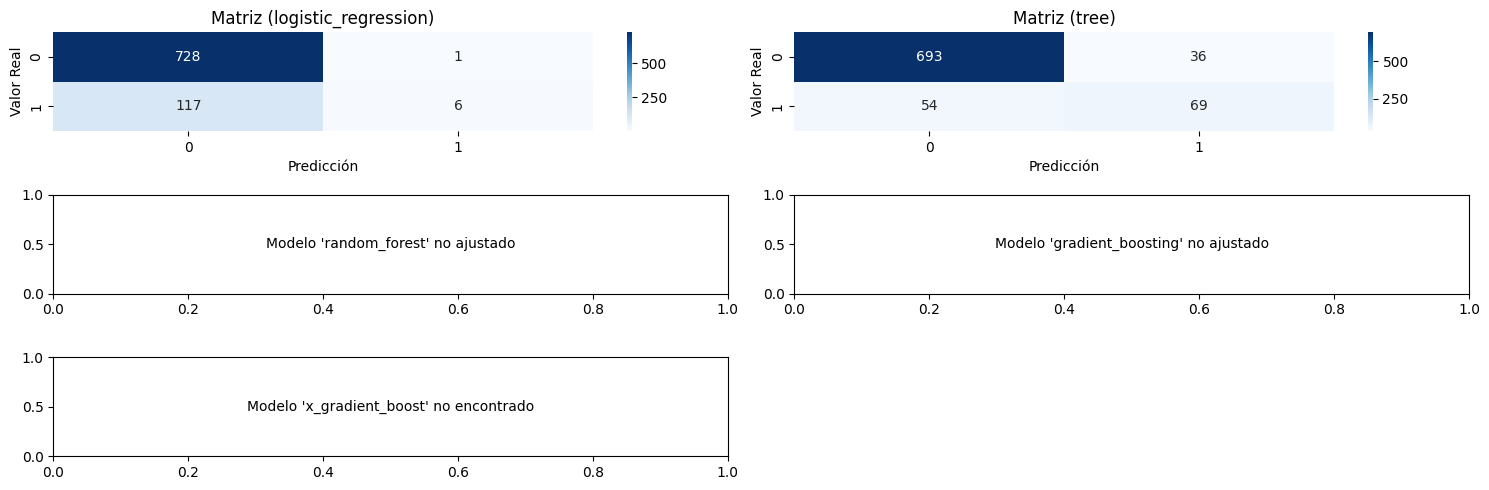

In [ ]:
analisis_mod_clas.shap_plots(["logistic_regression", "tree", "random_forest", "gradient_boosting", "xgboost"], plot_size=(15, 15), figsize=(10, 5))

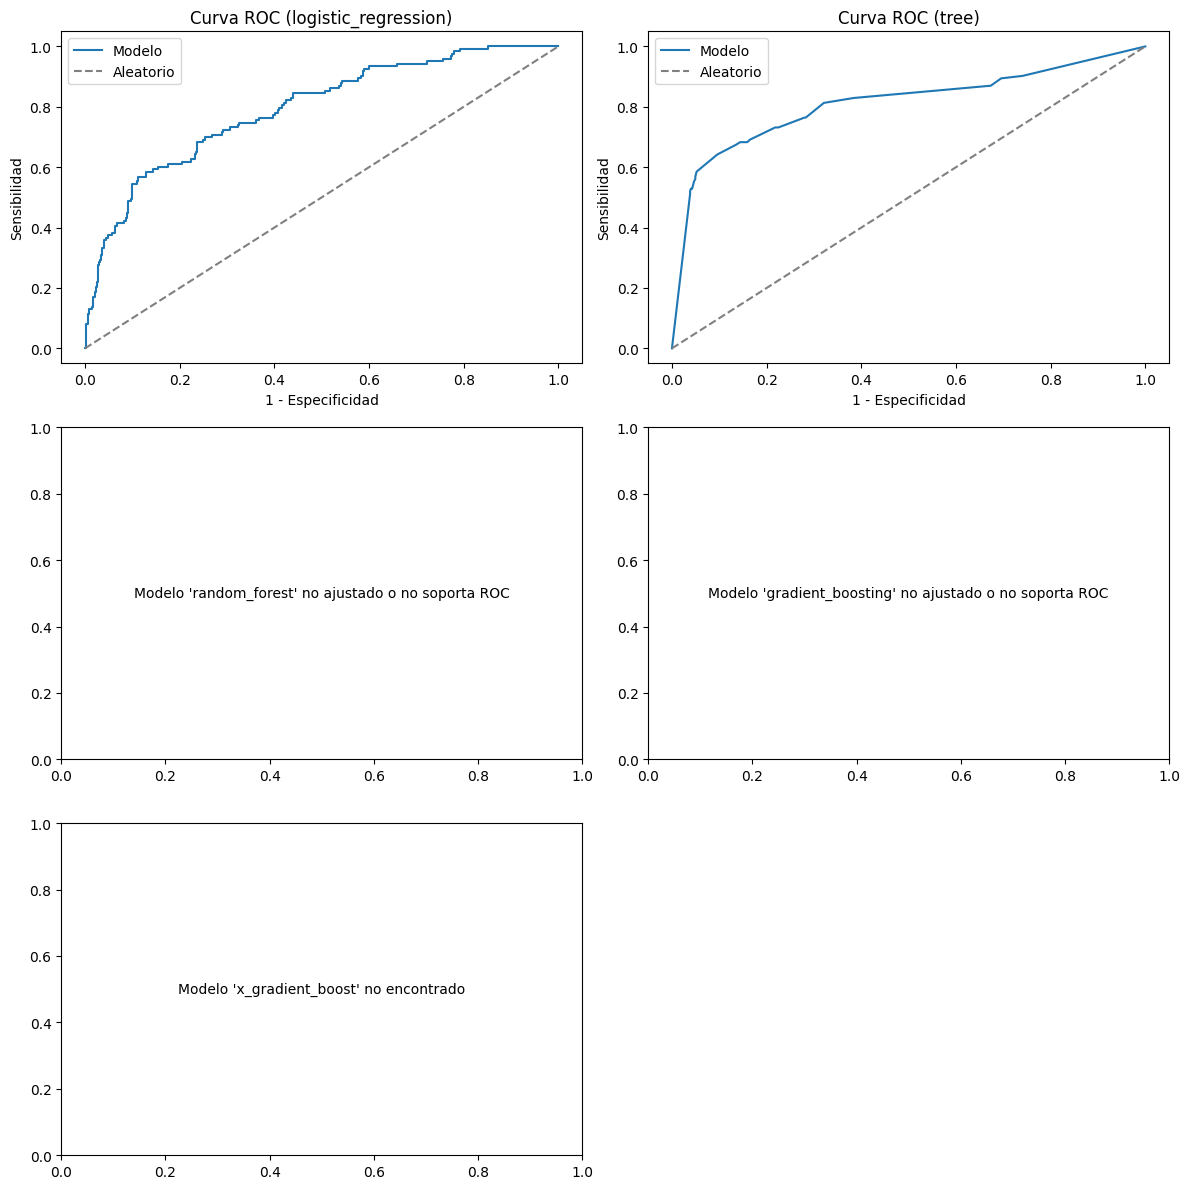

In [ ]:
analisis_mod_clas.matrices_confusion(["logistic_regression", "tree", "random_forest", "gradient_boosting", "xgboost"], figsize=(15,5))

In [ ]:
analisis_mod_clas.curvas_roc(["logistic_regression", "tree", "random_forest", "gradient_boosting", "xgboost"], figsize=(7,8))